In [21]:
from lib.threshold_tree import ThresholdTree
import numpy as np
from sklearn.datasets import make_blobs
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.datasets import load_iris, load_digits, load_wine, load_breast_cancer, load_diabetes

np.set_printoptions(suppress=True)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Create dataset and perform Clustering

In [22]:
# This block is in progress

# data = pd.read_csv('datasets/diabetes.csv')
# data.head()

# X = data.drop(columns=['Outcome'])
# _y = data['Outcome']

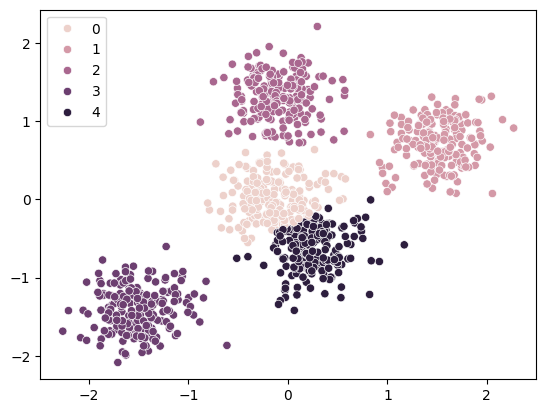

[[ 1.50509873  1.21592307]
 [-0.39009707 -0.27334501]
 [-0.20037056  1.36107705]
 [-0.08996861  1.56988027]
 [ 0.392269   -0.50365191]
 [-1.41256905 -1.34626623]
 [ 0.10319629 -0.38869039]
 [-0.64320045  1.55895196]
 [ 1.47644493  0.72977779]
 [-0.04592495  1.63369205]]


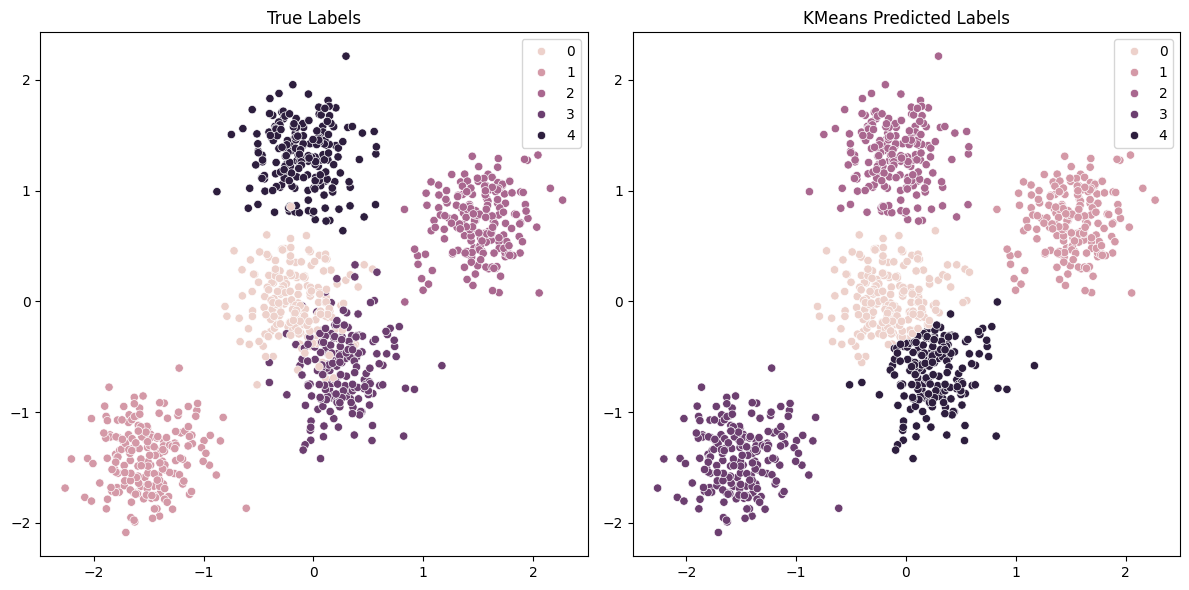

In [23]:
dims = 2
n = 1000
k = 5
min_impurity_decrease = 0.1
threshold_change = 0.01
robustness_factor = 0.7

X, _y = make_blobs(centers=k, cluster_std=1.4, n_features=dims, n_samples=n)
# data = load_iris()
# X, _y = data.data, data.target
# Normalize data
X = StandardScaler().fit_transform(X)

model = KMeans(n_clusters=k)
model.fit(X)

centers = model.cluster_centers_
y = model.predict(X)
dims = X.shape[1]
n = X.shape[0]
k = len(centers)

# plot the clusters
if dims > 2:
    pca = PCA(n_components=2)
    embed_X = pca.fit_transform(X)
    sns.scatterplot(x=embed_X[:, 0], y=embed_X[:, 1], hue=y, legend='full')
else:
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, legend='full')
plt.show()

print(X[:10])

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot with true labels
if dims > 2:
    sns.scatterplot(ax=axes[0], x=embed_X[:, 0], y=embed_X[:, 1], hue=_y, legend='full')
    axes[0].set_title("True Labels")
else:
    sns.scatterplot(ax=axes[0], x=X[:, 0], y=X[:, 1], hue=_y, legend='full')
    axes[0].set_title("True Labels")

# Plot with KMeans labels
if dims > 2:
    sns.scatterplot(ax=axes[1], x=embed_X[:, 0], y=embed_X[:, 1], hue=y, legend='full')
    axes[1].set_title("KMeans Predicted Labels")
else:
    sns.scatterplot(ax=axes[1], x=X[:, 0], y=X[:, 1], hue=y, legend='full')
    axes[1].set_title("KMeans Predicted Labels")

plt.tight_layout()
plt.show()

# Choose instance and target

In [24]:
instance_index = y.argmin()
instance = X[instance_index]
target_class = 2
target_point = centers[target_class, :]

print("")
print(f"Instance class: {y[instance_index]}, point: {instance}")
print(f"Target center class: {target_class}, point: {target_point}\n")


Instance class: 0, point: [-0.39009707 -0.27334501]
Target center class: 2, point: [-0.09500573  1.31243233]



# Find cfs using Decision Tree Classifier

DTC accuracy: 0.969

Instance: [-0.39009707 -0.27334501]
Instance prediction : [0]

CFS: [[-0.39009708  0.69068712]
 [-0.39009708  1.12590877]]
CF predictions:  [2 2]


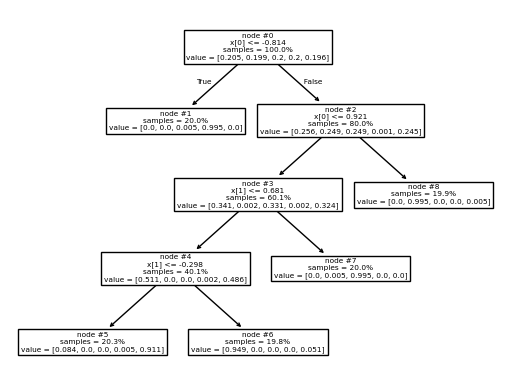

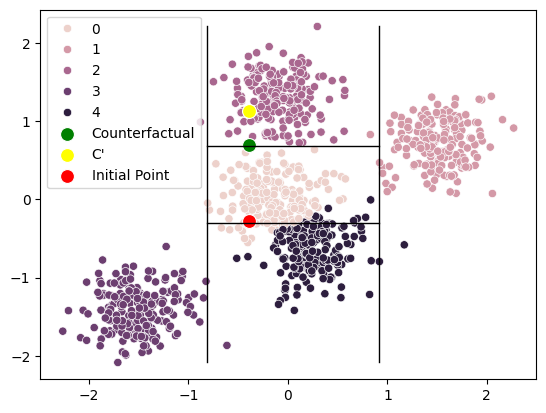

In [32]:
threshold_tree = ThresholdTree(model, centers, X, y)

cfs = threshold_tree.find_counterfactuals_dtc(instance, target_class, min_impurity_decrease=min_impurity_decrease, threshold_change=threshold_change, robustness_factor=robustness_factor)
print(f'Instance: {instance}')
print(f'Instance prediction : {model.predict([instance])}')
print("")
print(f'CFS: {cfs}')
print(f'CF predictions: ', model.predict(cfs))
threshold_tree.print_dtc_tree()
threshold_tree.plot_dtc_tree()

# Find cfs using Iterative Mistake Minimization(IMM)

Instance:  [-0.39009707 -0.27334501]
Counterfactual:  [[-0.39009707  0.67287087]]

Original class:  [0]
Counterfactual class:  [0]
├── L0: f1 < -0.04987313292823803
│   ├── L1: f0 < -0.6280580635865969
│   │   ├── L2, C: 3
│   │   └── L2, C: 4
│   └── L1: f0 < 0.6837981001764378
│       ├── L2: f1 < 0.6628708691049662
│       │   ├── L3, C: 0
│       │   └── L3, C: 2
│       └── L2, C: 1



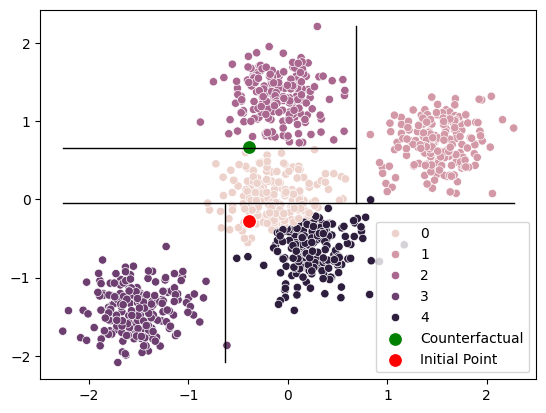

In [ ]:
cf = threshold_tree.find_counterfactuals_imm(instance, target_class, threshold_change=threshold_change)
print("Instance: ", instance)
print("Counterfactual: ", cf)
print("")
print("Original class: ", model.predict([instance]))
print("Counterfactual class: ", model.predict(cf))
threshold_tree.print_imm_tree()
threshold_tree.plot_imm_tree()